# The Sparks Foundation

# Task-1:- Predict the scores of the students based on their study hours using Supervised Learning.

## Author: Hritik Mohan Dobriyal

### Importing the required libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Understanding the Data

In [28]:
df = pd.read_csv("student_scores - student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [29]:
df.shape # shows no.of rows and columns in the dataset

(25, 2)

In [30]:
df.info() # To get the essential information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
df.describe() # shows description

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Evaluating for Missing Data

In [32]:
df.isnull() # To check whether there is any null value or not (Here, all values are False so there are no null values)

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Data Visualization

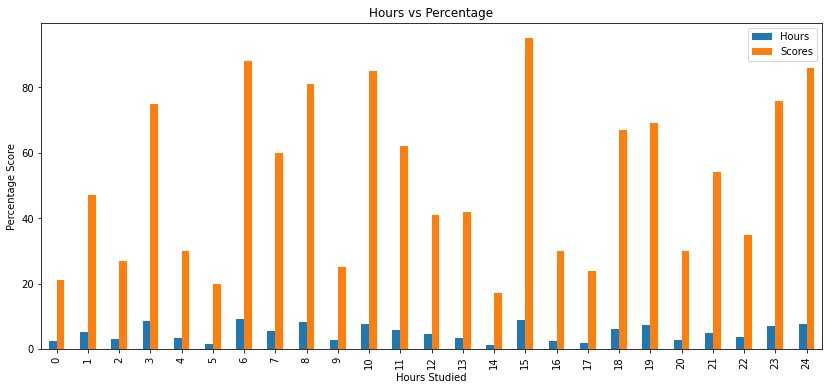

In [33]:
## Plotting the distribution of scores to understand the relation between the data.
df.plot(kind='bar',figsize=(14,6))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:>

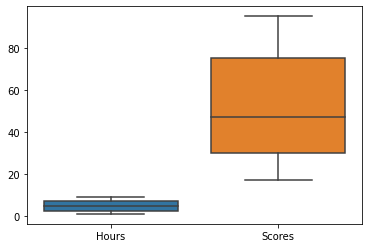

In [34]:
sns.boxplot(data = df) 

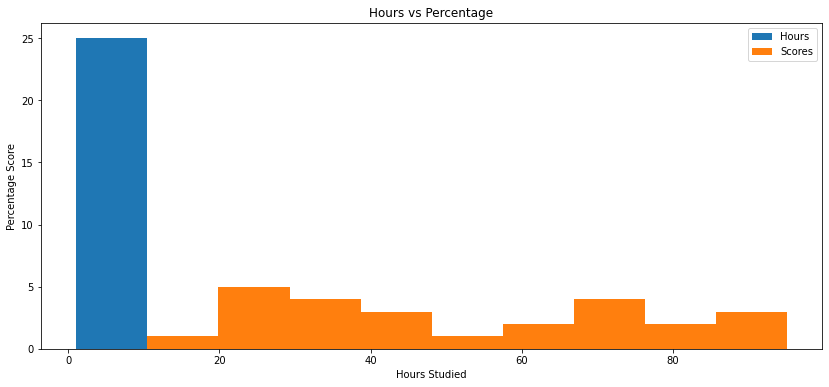

In [35]:
df.plot(kind='hist', figsize=(14,6))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [36]:
x, y = df['Hours'], df['Scores']

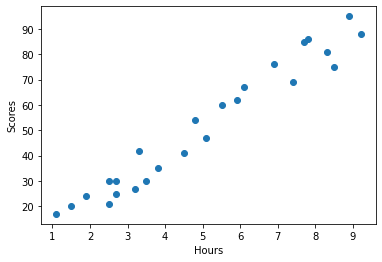

In [37]:
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Preparing the data for Modelling
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [38]:
a = df.iloc[:,:-1].values  
b = df.iloc[:, 1].values  

In [39]:
print(a)
print(b)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting the dataset into training and testing dataset, 63% for training, 37% for testing

In [40]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=.37, random_state=10)

### Plot for train dataset

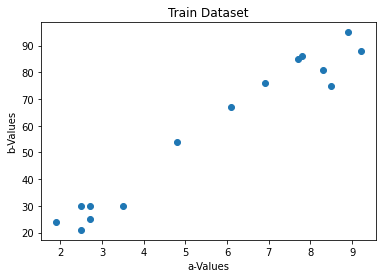

In [41]:
plt.scatter(a_train,b_train)
plt.title('Train Dataset')
plt.xlabel('a-Values')
plt.ylabel('b-Values')
plt.show()

### Plot for test dataset

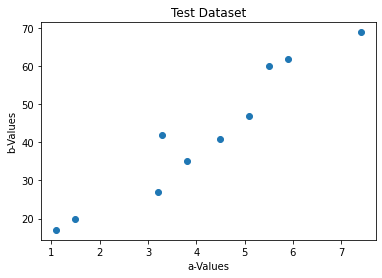

In [42]:
plt.scatter(a_test,b_test)
plt.title('Test Dataset')
plt.xlabel('a-Values')
plt.ylabel('b-Values')
plt.show()

### Creating linear regression object & Building the Linear Model & train it using the training sets

In [43]:
# create linear regression object
model = LinearRegression()
# Building the Linear Model & train it using the training sets
model.fit(a_train, b_train)
print("Training is complete")

Training is complete


### Calculating regression coefficients

In [44]:
# regression coefficients (i.e. slope)
print('Coefficients: ', model.coef_)

Coefficients:  [9.98768006]


### Checking the accuracy of the Model

In [45]:
print('Accuracy of model is: {} %' .format(round(model.score(a_test, b_test), 2) * 100))

Accuracy of model is: 90.0 %


### Calculating the intercept, slope and equation of line

In [46]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(f'Equation of Line: y = {round(model.coef_[0],2)}*x + {round(model.intercept_,2)}')

intercept: 1.8689916603487404
slope: [9.98768006]
Equation of Line: y = 9.99*x + 1.87


### Plotting the regression line for the test data

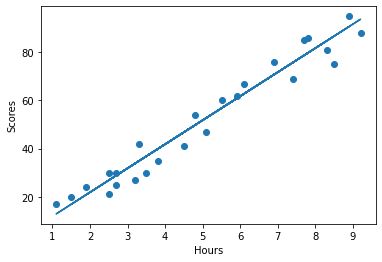

In [47]:
line = model.coef_*a+model.intercept_

plt.scatter(a, b)
plt.plot(a, line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Making Prediction

In [48]:
b_pred = model.predict(a_test)
print('predicted response:', b_pred)

predicted response: [16.85051175 52.80615997 34.82833586 33.82956785 46.81355193 75.77782411
 12.85543973 56.80123199 60.79630402 39.82217589]


In [49]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred})  
df1 

,Actual,Predicted
0,20,16.850512
1,47,52.806160
2,42,34.828336
3,27,33.829568
4,41,46.813552
5,69,75.777824
6,17,12.855440
7,60,56.801232
8,62,60.796304
9,35,39.822176


# Testing the model to predict the percentage of student if he studies for 9.25 hours as given

In [50]:
hours = 9.25
pred = model.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.25503222137982


### Evaluating the performance of the model

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, b_pred)) 

Mean Absolute Error: 4.891745640636846
